# SVR

### Ucitavanje biblioteka

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler

### Pretprocesiranje skupa podataka

In [4]:
%run Preprocessing.ipynb
data = preprocess_data(file_name = 'bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv')

Prvih 5 instanci skupa podataka pre sredjivanja:
     Timestamp  Open  High   Low  Close  Volume_(BTC)  Volume_(Currency)  \
0  1325317920  4.39  4.39  4.39   4.39      0.455581                2.0   
1  1325317980   NaN   NaN   NaN    NaN           NaN                NaN   
2  1325318040   NaN   NaN   NaN    NaN           NaN                NaN   
3  1325318100   NaN   NaN   NaN    NaN           NaN                NaN   
4  1325318160   NaN   NaN   NaN    NaN           NaN                NaN   

   Weighted_Price  
0            4.39  
1             NaN  
2             NaN  
3             NaN  
4             NaN  

Dimenzije skupa podataka pre sredjivanja:
 (4857377, 8)

Prvih 5 instanci skupa podataka nakon sredjivanja:
           Timestamp      Open      High       Low     Close  Volume_(BTC)  \
4854496  1616976000  55790.28  55822.98  55777.98  55804.36      1.731449   
4854497  1616976060  55822.98  55857.28  55822.98  55857.28      0.589603   
4854498  1616976120  55822.98  55829.0

### Uklanjanje nepotrebnih kolona

In [5]:
data = data.drop(['Timestamp', 'Open', 'High', 'Low', 'Volume_(BTC)','Volume_(Currency)','Weighted_Price', 'Date'], axis=1)
data.head()

,Close
4854496,55804.36
4854497,55857.28
4854498,55779.04
4854500,55768.63
4854501,55742.20


### Vizuelni prikaz podataka

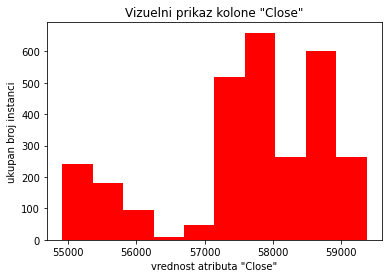

In [6]:
plt.title('Vizuelni prikaz kolone "Close"')
plt.hist(data['Close'],color='red')
plt.xlabel('vrednost atributa "Close"')
plt.ylabel('ukupan broj instanci')
plt.show()

Sa grafika se moze zakljuciti da najvise ima onih instanci cija je vrednost atributa 'Close' u intervalu [57000, 58000] i u intervalu [58500, 59000] (grubo).

### Podela skupa podataka

In [7]:
# Funkcija koja odredjuje skupove X i y (y je target promenljiva)
# na osnovu datog skupa podataka i dana za predvidjanje, tako sto
# kreira novu kolonu 'Predictions' u koju upisuje predvidjene vrednosti

def determine_x_and_y(days_to_predict, data):
    
    data['Predictions'] = data[['Close']].shift(-days_to_predict)

    last_instance = len(data) - days_to_predict

    X = data.drop(['Predictions'], 1)
    X = np.array(X)
    X = X[: last_instance]

    y = data['Predictions']
    y = np.array(y)
    y = y[: last_instance]
    
    
    # Vizuelni prikaz X i y
    
    plt.title('Vrednosti atributa X i ciljne promenljive y')
    plt.plot(y, label = 'y')
    plt.plot(X, label = 'X')
    #plt.xlabel('Timestamp')
    plt.ylabel('Close vrednost')
    plt.legend(loc = 'best')
    plt.show()
    
    return X, y

In [8]:
# Funkcija koja vrsi podelu skupa podataka
# na skupove za treniranje i testiranje

def split_data(days, data, test_size):
    
    X, y = determine_x_and_y(days, data)
    # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = 7, stratify = y) # TODO stratify = y
    
    limit = len(X) - test_size
    X_train = X[: limit]
    y_train = y[: limit]
    X_test = X[limit :]
    y_test = y[limit :]
    
    
    # Skaliranje
    
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    # Vizuelni prikaz
    
    # Obican vektor, nema info o Timestampu i slicno, zato je test na pocetku a ne u prouzetku
    
    plt.title('Train i test skup')
    plt.plot(X_train, label = 'X train')
    plt.plot(X_test, label = 'X test')
    plt.plot(y_train, label = 'y train')
    plt.plot(y_test, label = 'y test')
    #plt.xlabel('Timestamp')
    plt.ylabel('Close vrednost')
    plt.legend(loc = 'best')
    plt.show()
    
    return X, y, X_train, X_test, y_train, y_test

### Kreiranje i treniranje modela i racunanje skora

In [9]:
# Funkcija koja kreira model, trenira ga
# i izracunava skor (r2 skor) modela

def calculate_score(days, data, test_size = 100):
    
    X, y, X_train, X_test, y_train, y_test = split_data(days, data, test_size)
    
    # kreiranje Support Vector Machine (SVM) modela koristeci radial basis funkciju - rbf
    svr_rbf = SVR(kernel = 'rbf', gamma = 0.00001)
    
    # kreiranje Support Vector Machine (SVM) modela koristeci poly funkciju
    svr_poly = SVR(kernel='poly', epsilon=.2, coef0=1)
    
    # kreiranje Support Vector Machine (SVM) modela koristeci sigmoid funkciju
    svr_sigmoid = SVR(kernel='sigmoid', C = 0.1, epsilon=.2)
    
    # kreiranje Support Vector Machine (SVM) modela koristeci linear funkciju
    svr_linear = SVR(kernel='linear', C = 0.1, epsilon=.2)

    # treniranje modela
    svr_rbf.fit(X_train, y_train)
    svr_poly.fit(X_train, y_train)
    svr_sigmoid.fit(X_train, y_train)
    svr_linear.fit(X_train, y_train)
    
    # racunanje r2 skora modela
    svr_rbf_score = svr_rbf.score(X_test, y_test)
    svr_poly_score = svr_poly.score(X_test, y_test)
    svr_sigmoid_score = svr_sigmoid.score(X_test, y_test)
    svr_linear_score = svr_linear.score(X_test, y_test)
    
    models = [svr_rbf, svr_poly, svr_sigmoid, svr_linear]
    scores = [svr_rbf_score, svr_poly_score, svr_sigmoid_score, svr_linear_score]
    
    return models, scores, X_test, y_test

In [10]:
data.head()

,Close
4854496,55804.36
4854497,55857.28
4854498,55779.04
4854500,55768.63
4854501,55742.20


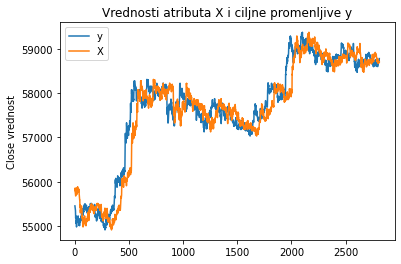

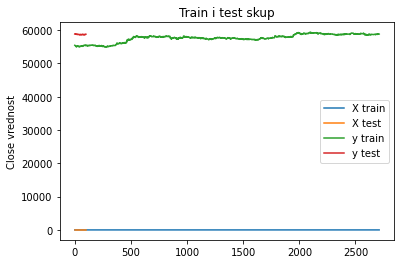

In [11]:
# Izvrsavanje funkcije

days_to_predict = 60

models, scores, X_test, y_test = calculate_score(days = days_to_predict, data = data, test_size = 100)

In [12]:
# Skorovi

svr_rbf_score = scores[0]

svr_poly_score = scores[1]

svr_sigmoid_score = scores[2]

svr_linear_score = scores[3]

In [13]:
# Modeli

svr_rbf = models[0]
svr_poly = models[1]
svr_sigmoid = models[2]
svr_linear = models[3]

In [14]:
# Drugi nacin za racunanje skora

from sklearn.metrics import r2_score
r2_score(y_test, svr_rbf.predict(X_test)), r2_score(y_test, svr_poly.predict(X_test)), r2_score(y_test, svr_sigmoid.predict(X_test)), r2_score(y_test, svr_linear.predict(X_test))

(-140.53664902683028,
 -1.549573516069544,
 -142.10822814735718,
 -137.65154684940134)

### Vizuelni prikazi predvidjanja SVRa sa razlicitim kernelima

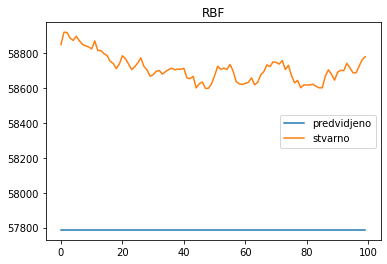

In [15]:
# RBF

svr_rbf_pred = svr_rbf.predict(X_test)
plt.title('RBF')
plt.plot(svr_rbf_pred, label='predvidjeno')
plt.plot(y_test, label = 'stvarno')
plt.legend()
plt.show()

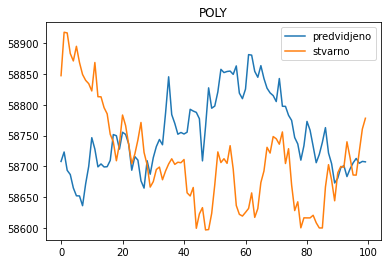

In [16]:
# POLY

svr_poly_pred = svr_poly.predict(X_test)
plt.title('POLY')
plt.plot(svr_poly_pred, label = 'predvidjeno')
plt.plot(y_test, label = 'stvarno')
plt.legend()
plt.show()

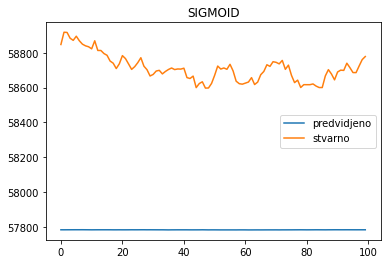

In [17]:
# SIGMOID

svr_sigmoid_pred = svr_sigmoid.predict(X_test)
plt.title('SIGMOID')
plt.plot(svr_sigmoid_pred, label = 'predvidjeno')
plt.plot(y_test, label = 'stvarno')
plt.legend()
plt.show()

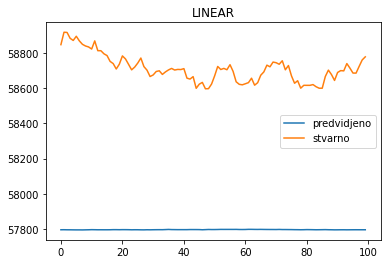

In [18]:
# LINEAR

svr_linear_pred = svr_linear.predict(X_test)
plt.title('LINEAR')
plt.plot(svr_linear_pred, label='predvidjeno')
plt.plot(y_test, label='stvarno')
plt.legend()
plt.show()

### Vizuelni prikaz R2 skora

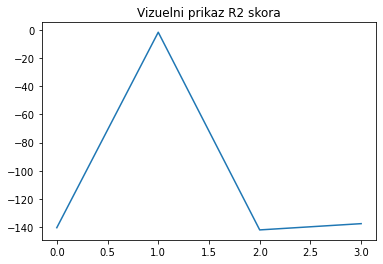

In [19]:
plt.title('Vizuelni prikaz R2 skora')
plt.plot([svr_rbf_score, svr_poly_score, svr_sigmoid_score, svr_linear_score])
plt.show()

### Vizuelni prikaz MSE

MSE:
 842520.0616504315 15492.555869386568 869601.2121116553 860051.4669584114


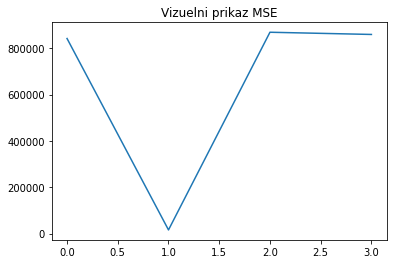

In [20]:
from sklearn.metrics import mean_squared_error

print('MSE:\n', mean_squared_error(y_test, svr_linear_pred), mean_squared_error(y_test, svr_poly_pred), mean_squared_error(y_test, svr_sigmoid_pred), mean_squared_error(y_test, svr_rbf_pred))

plt.title('Vizuelni prikaz MSE')
plt.plot([mean_squared_error(y_test, svr_linear_pred), mean_squared_error(y_test, svr_poly_pred), mean_squared_error(y_test, svr_sigmoid_pred), mean_squared_error(y_test, svr_rbf_pred)])
plt.show()

### Vizuelni prikaz MAE

MAE:
 914.54350637936 103.66145851231289 929.2698065659783 924.1076387053442


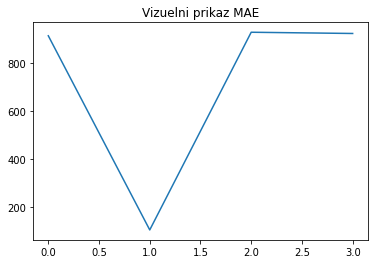

In [21]:
from sklearn.metrics import mean_absolute_error

print('MAE:\n', mean_absolute_error(y_test, svr_linear_pred), mean_absolute_error(y_test, svr_poly_pred), mean_absolute_error(y_test, svr_sigmoid_pred), mean_absolute_error(y_test, svr_rbf_pred))

plt.title('Vizuelni prikaz MAE')
plt.plot([mean_absolute_error(y_test, svr_linear_pred), mean_absolute_error(y_test, svr_poly_pred), mean_absolute_error(y_test, svr_sigmoid_pred), mean_absolute_error(y_test, svr_rbf_pred)])
plt.show()

In [22]:
data.tail()

,Close,Predictions
4857372,58686.00,NaN
4857373,58685.81,NaN
4857374,58723.84,NaN
4857375,58760.59,NaN
4857376,58778.18,NaN


### Predvidjanje vrednosti za skup od poslednjih n instanci skupa podataka za koje je 'Predictions' = NaN

In [23]:
# data['Predictions'] = data[['Close']].shift(-n)
# data

In [24]:
# Kreiranje niza koji sadrzi poslednjih n = 60 dana
# (redova/instanci) iz originalnog skupa podataka

predictions_array = np.array(data.drop(['Predictions'],1))[-60:]
print(predictions_array)

[[58711.15]
 [58657.09]
 [58651.95]
 [58665.72]
 [58599.47]
 [58622.88]
 [58632.99]
 [58596.81]
 [58597.38]
 [58623.63]
 [58670.06]
 [58723.52]
 [58706.24]
 [58712.46]
 [58704.96]
 [58733.62]
 [58695.71]
 [58636.47]
 [58622.13]
 [58619.3 ]
 [58625.31]
 [58631.65]
 [58656.9 ]
 [58617.21]
 [58631.35]
 [58673.85]
 [58692.46]
 [58730.96]
 [58721.65]
 [58748.45]
 [58744.88]
 [58736.03]
 [58755.94]
 [58704.68]
 [58728.74]
 [58669.75]
 [58628.24]
 [58642.47]
 [58600.2 ]
 [58616.45]
 [58616.33]
 [58616.33]
 [58620.59]
 [58608.38]
 [58600.  ]
 [58600.  ]
 [58666.54]
 [58702.79]
 [58677.7 ]
 [58644.13]
 [58689.44]
 [58699.9 ]
 [58698.5 ]
 [58739.95]
 [58714.31]
 [58686.  ]
 [58685.81]
 [58723.84]
 [58760.59]
 [58778.18]]


In [25]:
# Ispis stvarne vrednosti bitkoina u poslednjih n = 60 dana
# Predvidjene vrednosti su NaN

print(data.tail(60))

            Close  Predictions
4857315  58711.15          NaN
4857316  58657.09          NaN
4857317  58651.95          NaN
4857318  58665.72          NaN
4857319  58599.47          NaN
4857320  58622.88          NaN
4857321  58632.99          NaN
4857322  58596.81          NaN
4857323  58597.38          NaN
4857324  58623.63          NaN
4857325  58670.06          NaN
4857326  58723.52          NaN
4857327  58706.24          NaN
4857328  58712.46          NaN
4857329  58704.96          NaN
4857330  58733.62          NaN
4857331  58695.71          NaN
4857332  58636.47          NaN
4857333  58622.13          NaN
4857334  58619.30          NaN
4857335  58625.31          NaN
4857336  58631.65          NaN
4857337  58656.90          NaN
4857338  58617.21          NaN
4857339  58631.35          NaN
4857341  58673.85          NaN
4857342  58692.46          NaN
4857343  58730.96          NaN
4857344  58721.65          NaN
4857345  58748.45          NaN
4857346  58744.88          NaN
4857347 

In [26]:
# Predvidjanje i ispis predvidjenih vrednosti
# bitkoina u poslednjih n = 60 dana

svm_n_last_day_predictions = svr_rbf.predict(predictions_array)
print(svm_n_last_day_predictions)

[57787.06845758 57787.06845758 57787.06845758 57787.06845758
 57787.06845758 57787.06845758 57787.06845758 57787.06845758
 57787.06845758 57787.06845758 57787.06845758 57787.06845758
 57787.06845758 57787.06845758 57787.06845758 57787.06845758
 57787.06845758 57787.06845758 57787.06845758 57787.06845758
 57787.06845758 57787.06845758 57787.06845758 57787.06845758
 57787.06845758 57787.06845758 57787.06845758 57787.06845758
 57787.06845758 57787.06845758 57787.06845758 57787.06845758
 57787.06845758 57787.06845758 57787.06845758 57787.06845758
 57787.06845758 57787.06845758 57787.06845758 57787.06845758
 57787.06845758 57787.06845758 57787.06845758 57787.06845758
 57787.06845758 57787.06845758 57787.06845758 57787.06845758
 57787.06845758 57787.06845758 57787.06845758 57787.06845758
 57787.06845758 57787.06845758 57787.06845758 57787.06845758
 57787.06845758 57787.06845758 57787.06845758 57787.06845758]


In [27]:
# Kreiranje DataFrame-a 'predictions_df' i
# dodavanje predvidjenih vrednosti u 'predictions_df'

predictions_df = pd.DataFrame(data['Close'][-60:], columns = ['Close'])
predictions_df['Predictions'] = svm_n_last_day_predictions
predictions_df

,Close,Predictions
4857315,58711.15,57787.068458
4857316,58657.09,57787.068458
4857317,58651.95,57787.068458
4857318,58665.72,57787.068458
4857319,58599.47,57787.068458
4857320,58622.88,57787.068458
4857321,58632.99,57787.068458
4857322,58596.81,57787.068458
4857323,58597.38,57787.068458
4857324,58623.63,57787.068458


In [28]:
# Uklanjanje NaN vrednosti (nastale usled siftovanja)
# iz originalnog DataFrame-a

data = data.dropna()
data

,Close,Predictions
4854496,55804.36,55457.06
4854497,55857.28,55439.84
4854498,55779.04,55415.07
4854500,55768.63,55414.25
4854501,55742.20,55386.82
...,...,...
4857310,58703.95,58686.00
4857311,58712.34,58685.81
4857312,58703.26,58723.84
4857313,58706.76,58760.59


In [29]:
# Nadovezivanje kreiranog DataFrame-a na originalni DataFrame
# (dodavanje predvidjenih vrednosti u originalni DataFrame)

data = data.append(predictions_df)
data

,Close,Predictions
4854496,55804.36,55457.060000
4854497,55857.28,55439.840000
4854498,55779.04,55415.070000
4854500,55768.63,55414.250000
4854501,55742.20,55386.820000
...,...,...
4857372,58686.00,57787.068458
4857373,58685.81,57787.068458
4857374,58723.84,57787.068458
4857375,58760.59,57787.068458


In [30]:
# Provera

data.tail(60)

,Close,Predictions
4857315,58711.15,57787.068458
4857316,58657.09,57787.068458
4857317,58651.95,57787.068458
4857318,58665.72,57787.068458
4857319,58599.47,57787.068458
4857320,58622.88,57787.068458
4857321,58632.99,57787.068458
4857322,58596.81,57787.068458
4857323,58597.38,57787.068458
4857324,58623.63,57787.068458
